<a href="https://colab.research.google.com/github/Hanzlah10/CFA/blob/main/Final_CFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'

# Define column names
columns = [
    'Pregnancies', 'Glucose', 'BP', 'SkinThickness',
    'Insulin', 'BMI', 'DPF', 'Age', 'Outcome'
]
# DiabetesPedigreeFunction
# Load the dataset with column names
data = pd.read_csv(url, header=None, names=columns)

# Display the first few rows
print(data.head())

   Pregnancies  Glucose  BP  SkinThickness  Insulin   BMI    DPF  Age  Outcome
0            6      148  72             35        0  33.6  0.627   50        1
1            1       85  66             29        0  26.6  0.351   31        0
2            8      183  64              0        0  23.3  0.672   32        1
3            1       89  66             23       94  28.1  0.167   21        0
4            0      137  40             35      168  43.1  2.288   33        1


In [3]:
data.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Check for missing values
print(data.isnull().sum())

Pregnancies      0
Glucose          0
BP               0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64


In [5]:
total_samples = len(data)

# Count the number of samples for each class
class_counts = data['Outcome'].value_counts()
print(class_counts)

# Calculate the percentage for each class
percentages = (class_counts / total_samples) * 100

# Print the results
print("Class Percentages:")
for label, percentage in percentages.items():
    print(f" - Class {label}: {percentage:.2f}%")

Outcome
0    500
1    268
Name: count, dtype: int64
Class Percentages:
 - Class 0: 65.10%
 - Class 1: 34.90%


**DATASET IS IMBALANCED**

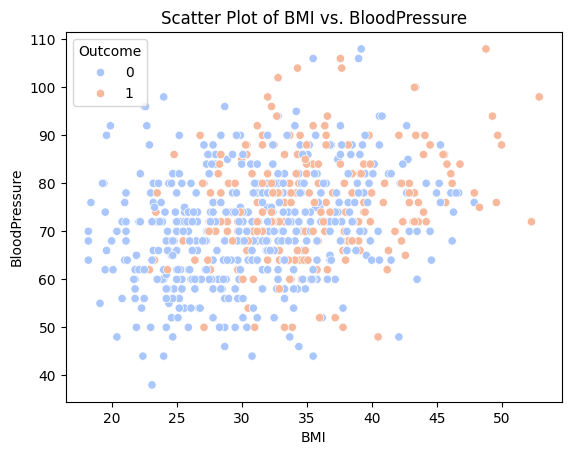

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize outliers
sns.scatterplot(data=data, x='BMI', y='BP', hue='Outcome', palette='coolwarm')
plt.title('Scatter Plot of BMI vs. BloodPressure')
plt.xlabel('BMI')
plt.ylabel('BloodPressure')
plt.show()


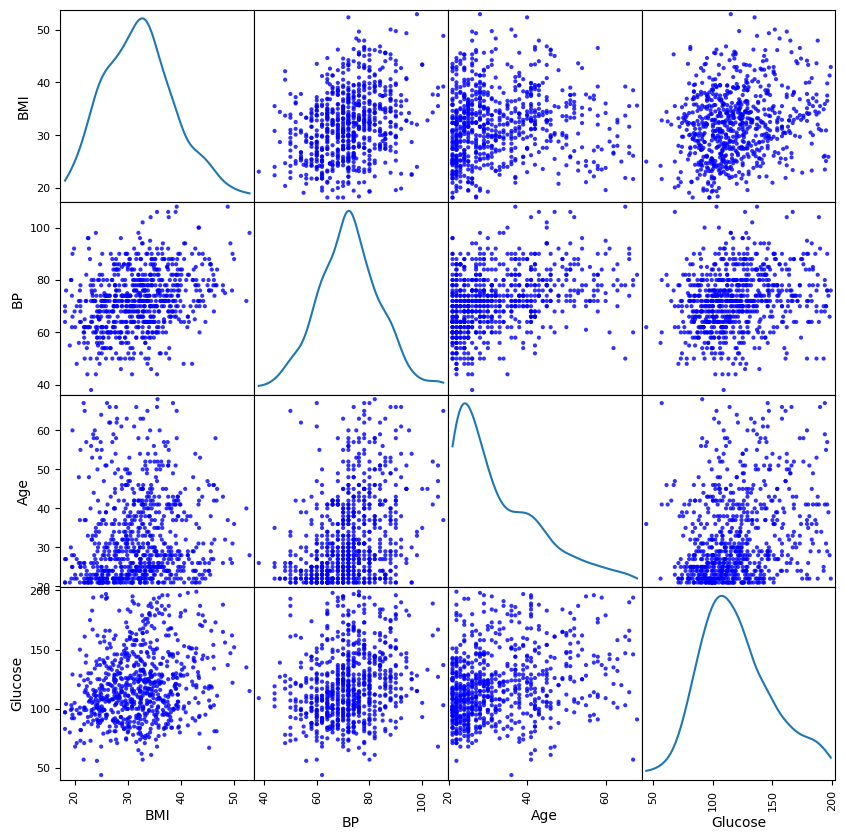

In [26]:
from pandas.plotting import scatter_matrix

# Select features to visualize
scatter_matrix(data[['BMI', 'BP', 'Age', 'Glucose']], figsize=(10, 10), alpha=0.8, diagonal='kde', color='blue')
plt.show()


In [21]:
columns_with_zeros = ['Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

In [22]:
for column in columns_with_zeros:
    data[column].fillna(data[column].median(), inplace=True)


<ipython-input-22-442e9fbbdc48>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)


In [23]:
from scipy.stats import zscore

data = data[(np.abs(zscore(data[['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']])) < 3).all(axis=1)]


In [27]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    718 non-null    int64  
 1   Glucose        718 non-null    float64
 2   BP             718 non-null    float64
 3   SkinThickness  718 non-null    float64
 4   Insulin        718 non-null    float64
 5   BMI            718 non-null    float64
 6   DPF            718 non-null    float64
 7   Age            718 non-null    int64  
 8   Outcome        718 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 56.1 KB
None
       Pregnancies     Glucose          BP  SkinThickness     Insulin  \
count   718.000000  718.000000  718.000000     718.000000  718.000000   
mean      3.834262  120.009749   72.274373      28.715877  130.305014   
std       3.275640   29.663264   11.334827       8.157108   55.569327   
min       0.000000   44.000000   38.000000       7.000000   15.000000

In [6]:
# Feature matrix X and target vector y
X = data.drop('Outcome', axis=1)  # 'Outcome' is the target variable
y = data['Outcome']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**BASE MODEL**



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
model_before = RandomForestClassifier(random_state=42)
model_before.fit(X_train, y_train)


y_pred_before = model_before.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
print(f"Accuracy before CFA: {accuracy_before * 100:.4f}%")

Accuracy before CFA: 72.7273%








**Implement Counterfactual Data Augmentation (CFA)**



In [29]:
# Determine the majority and minority classes
minority_class = y_train.value_counts().idxmin()  # Minority class (either 0 or 1)
majority_class = y_train.value_counts().idxmax()  # Majority class (either 0 or 1)

# Identify the minority and majority class instances
minority_class_instances = X_train[y_train == minority_class]
majority_class_instances = X_train[y_train == majority_class]

# Use SHAP to identify influential features
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

import shap  # Ensure SHAP is installed via `pip install shap`
explainer = shap.TreeExplainer(baseline_model)
shap_values = explainer.shap_values(X_train)

# Get the top 5 influential features for the minority class
important_features = np.argsort(np.abs(shap_values[minority_class]).mean(axis=0))[-5:]

# Generate counterfactuals using the identified features
counterfactuals = []

for minority_instance in minority_class_instances:
    # Find the closest majority instance based on important features
    minority_values = minority_instance[important_features]
    closest_majority_idx = np.argmin(
        np.linalg.norm(majority_class_instances[:, important_features] - minority_values, axis=1)
    )
    closest_majority_instance = majority_class_instances[closest_majority_idx]

    # Compute feature-wise difference and generate counterfactual
    feature_difference = closest_majority_instance - minority_instance
    counterfactual = minority_instance + 0.5 * feature_difference  # Adjust scaling factor as needed
    counterfactuals.append(counterfactual)

# Convert the counterfactuals to a DataFrame
counterfactuals = np.array(counterfactuals)
counterfactuals_df = pd.DataFrame(counterfactuals, columns=X.columns)

# Augment the dataset with counterfactuals
X_train_augmented = np.vstack([X_train, counterfactuals_df])
y_train_augmented = np.hstack([y_train, [minority_class] * len(counterfactuals)])

# Check the new shape of the features and labels
print("New feature shape:", X_train_augmented.shape)  # Should show original + counterfactual rows
print("New label shape:", y_train_augmented.shape)    # Should show original + counterfactual labels


New feature shape: (827, 8)
New label shape: (827,)


In [31]:
from collections import Counter

# Check class counts before and after augmentation
original_class_counts = Counter(y_train)  # Class counts before CFA
augmented_class_counts = Counter(y_train_augmented)  # Class counts after CFA

print("Class counts before and after CFA:\n")
for cls in sorted(set(original_class_counts.keys()).union(augmented_class_counts.keys())):
    print(f"For class {cls}:")
    print(f"  Before CFA: {original_class_counts.get(cls, 0)}")
    print(f"  After CFA: {augmented_class_counts.get(cls, 0)}\n")

Class counts before and after CFA:

For class 0:
  Before CFA: 401
  After CFA: 401

For class 1:
  Before CFA: 213
  After CFA: 426



**AFTER CFA**

In [44]:
# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the augmented dataset
clf.fit(X_train_augmented, y_train_augmented)

RandomForestClassifier(random_state=42)

In [33]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate using classification report
print(classification_report(y_test, y_pred))

# Compute AUC
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("AUC: ", roc_auc)

# Accuracy
accuracy_score_cfa = accuracy_score(y_test, y_pred)
print(f"Accuracy after CFA: {accuracy_score_cfa * 100:.4f}%")


              precision    recall  f1-score   support

           0       0.84      0.76      0.80        99
           1       0.63      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154

AUC:  0.8007346189164372
Accuracy after CFA: 75.3247%


In [34]:
# Train the baseline model (without CFA)
clf_baseline = RandomForestClassifier(random_state=42)
clf_baseline.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [35]:
# Predict on the test set
y_pred_baseline = clf_baseline.predict(X_test)

# Evaluate using classification report
print("Baseline Model Classification Report:")
print(classification_report(y_test, y_pred_baseline))

# Compute AUC for baseline
roc_auc_baseline = roc_auc_score(y_test, clf_baseline.predict_proba(X_test)[:, 1])
print("Baseline AUC: ", roc_auc_baseline)

#Accuracy
accuracy_score_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Accuracy before CFA: {accuracy_score_baseline * 100:.4f}%")


Baseline Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Baseline AUC:  0.813406795224977
Accuracy before CFA: 72.7273%


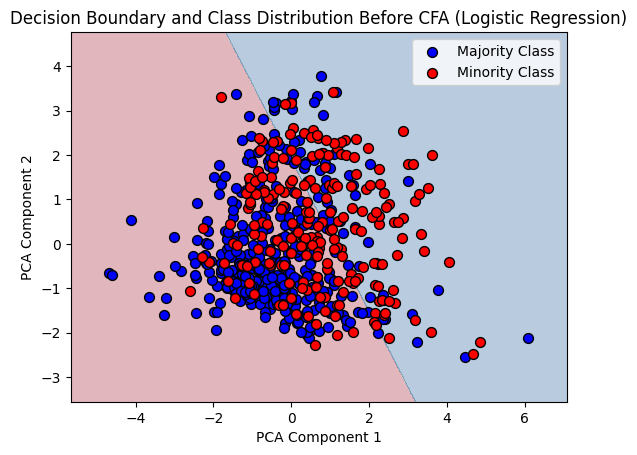

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Use PCA to reduce the dimensions of the data to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Train the Logistic Regression model on the original data
clf_lr_before_cfa = LogisticRegression(random_state=42)
clf_lr_before_cfa.fit(X_train_2d, y_train)

# Create a mesh grid for the reduced 2D data
h = .02  # Step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class probabilities for each point in the mesh grid
Z = clf_lr_before_cfa.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)

# Plot the majority and minority class points in the reduced 2D space
plt.scatter(X_train_2d[y_train == majority_class, 0],
            X_train_2d[y_train == majority_class, 1],
            c='blue', label='Majority Class', edgecolors='k', s=50)
plt.scatter(X_train_2d[y_train == minority_class, 0],
            X_train_2d[y_train == minority_class, 1],
            c='red', label='Minority Class', edgecolors='k', s=50)

plt.title('Decision Boundary and Class Distribution Before CFA (Logistic Regression)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

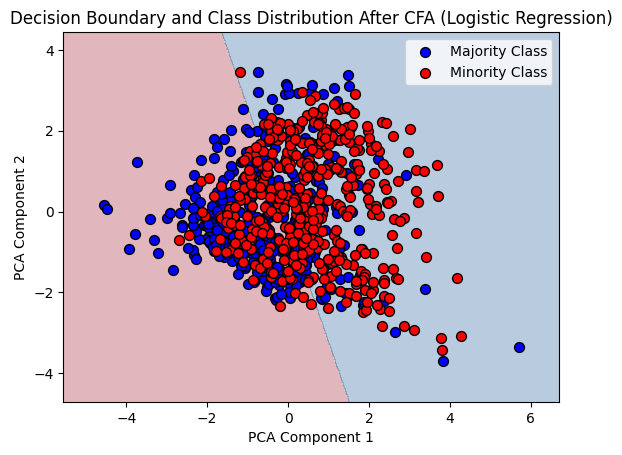

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Reduce the dataset to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_augmented_2d = pca.fit_transform(X_train_augmented)

# Train the model using Logistic Regression for better decision boundary visualization
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train_augmented_2d, y_train_augmented)

# Create a mesh grid for the reduced 2D data
h = .02  # Step size in the mesh
x_min, x_max = X_train_augmented_2d[:, 0].min() - 1, X_train_augmented_2d[:, 0].max() + 1
y_min, y_max = X_train_augmented_2d[:, 1].min() - 1, X_train_augmented_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class probabilities for each point in the mesh grid
Z = clf_lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)

# Plot the majority and minority class points in the reduced 2D space
plt.scatter(X_train_augmented_2d[y_train_augmented == majority_class, 0],
            X_train_augmented_2d[y_train_augmented == majority_class, 1],
            c='blue', label='Majority Class', edgecolors='k', s=50)
plt.scatter(X_train_augmented_2d[y_train_augmented == minority_class, 0],
            X_train_augmented_2d[y_train_augmented == minority_class, 1],
            c='red', label='Minority Class', edgecolors='k', s=50)

plt.title('Decision Boundary and Class Distribution After CFA (Logistic Regression)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


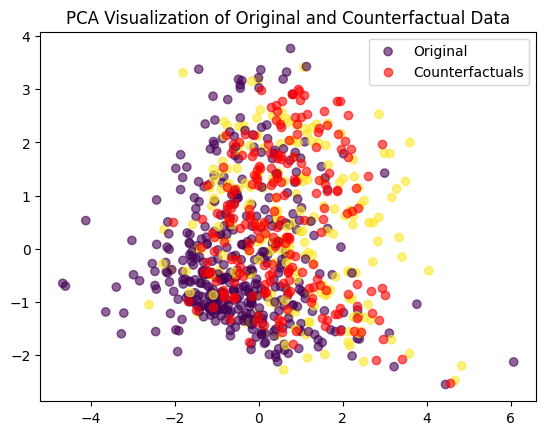

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
X_augmented_pca = pca.transform(X_train_augmented)

# Scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, label="Original", alpha=0.6)
plt.scatter(X_augmented_pca[len(X_train):, 0], X_augmented_pca[len(X_train):, 1], c='red', label="Counterfactuals", alpha=0.6)
plt.legend()
plt.title("PCA Visualization of Original and Counterfactual Data")
plt.show()

**Before Vs After CFA Distribution.**

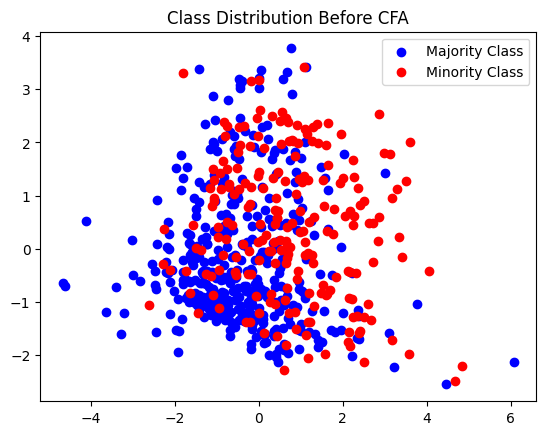

In [39]:
# Apply PCA to the original data (before CFA)
X_original_pca = pca.fit_transform(X_train)

# Plot all classes before CFA
plt.scatter(X_original_pca[y_train == majority_class, 0],
            X_original_pca[y_train == majority_class, 1],
            c='blue', label='Majority Class')
plt.scatter(X_original_pca[y_train == minority_class, 0],
            X_original_pca[y_train == minority_class, 1],
            c='red', label='Minority Class')
plt.legend()
plt.title("Class Distribution Before CFA")
plt.show()


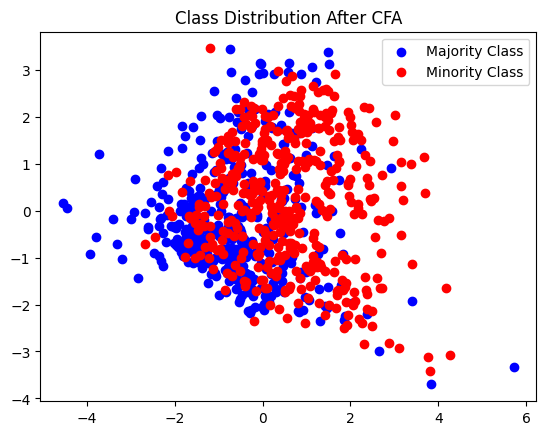

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_augmented_pca = pca.fit_transform(X_train_augmented)

# Plot all classes
plt.scatter(X_augmented_pca[y_train_augmented == majority_class, 0],
            X_augmented_pca[y_train_augmented == majority_class, 1],
            c='blue', label='Majority Class')
plt.scatter(X_augmented_pca[y_train_augmented == minority_class, 0],
            X_augmented_pca[y_train_augmented == minority_class, 1],
            c='red', label='Minority Class')
plt.legend()
plt.title("Class Distribution After CFA")
plt.show()


In [42]:
print(f"CFA Model Accuracy: {accuracy_score_cfa}")
print(f"Baseline Model Accuracy: {accuracy_score_baseline}")

CFA Model Accuracy: 0.7532467532467533
Baseline Model Accuracy: 0.7272727272727273
